<a href="https://colab.research.google.com/github/hasanzeynal/Tensorflow-Developer-Certificate/blob/main/01_Neural_Network_Regression_in_TensorFlow/neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Basic Neural Network Model for Regression Problem
Then, After building our basic NN model, we are gonna try:
* improving our model
* evaluating
* setting
* saving
* loading
* processing with feature scalling(normalising, fitting model on a scaled data)

## Building Basic Model in TensorFlow

## Creating Data, So we can model it

In [3]:
X = tf.constant([-1,1,3,5,7,9,11,13,15,17,19,21,23])
y = tf.constant([9,11,13,15,17,19,21,23,25,27,29,31,33])  #the difference between X and y is 10

In [4]:
#looking for the input and output shape
X.shape,y.shape  #just we are gonna need comma in the tensoor shape after 14 so shape is (14,)

(TensorShape([13]), TensorShape([13]))

### Steps in Modelling in TensorFlow.
1. **Creating Model** - define imput, output, hidden layers of our Deep Learning Model.

2. **Compiling Model** - define the loss function(the function which tell us how wrong our model is), define optimizer(which tell us our model how improve) and evaluation metrics(we can use to interpret the performance of our model).

3. Fitting Model - letting the model try to find patterns between X and y(features and labels)

In [5]:
#change 1 rank tensoir to the 2 rank tensor
tf.expand_dims(X,-1)

<tf.Tensor: shape=(13, 1), dtype=int32, numpy=
array([[-1],
       [ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23]], dtype=int32)>

In [6]:
#creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
#adding dense layer with the 1 neuron
#model.add(tf.keras.layers.Dense(1, input_shape = (14,)))
#model.add(tf.keras.layers.Dense(1))

#compiling the model
model.compile(loss= tf.keras.losses.mae,  #MAE stands for the Mean Absolute Error
              optimizer= tf.keras.optimizers.SGD(), #SGD stands for the Stochastic Gradient Error
              metrics= ['mae'])

#fitting the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs= 5)  #axis= -1 makes 2 rank tensor,1 rank tensor is caused an error

Epoch 1/5
1/1 [==============================] - 1s 785ms/step - loss: 24.2363 - mae: 24.2363
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 23.0163 - mae: 23.0163
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 21.7963 - mae: 21.7963
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 20.5763 - mae: 20.5763
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 19.3563 - mae: 19.3563


In [7]:
#trying make prediction based on X for y
model.predict([25])     #if our model is good enough, the answer would be around 35

1/1 [==============================] - 0s 98ms/step


array([[6.444707]], dtype=float32)

## Improving our model

### Creating new model to improve our result

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = True)

In [9]:
#create a model(specified to your probelm)
improved_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile model
improved_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                       metrics = ['mae'])

#fit the model with the subset of X and y and 100 epochs
improved_model.fit(tf.expand_dims(X_train,axis= 1),y_train,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 800ms/step - loss: 22.1440 - mae: 22.1440
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 21.6828 - mae: 21.6828
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 21.2460 - mae: 21.2460
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 20.8198 - mae: 20.8198
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 20.4058 - mae: 20.4058
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 20.0141 - mae: 20.0141
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 19.6425 - mae: 19.6425
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 19.2666 - mae: 19.2666
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 18.8908 - mae: 18.8908
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 18.5333 - mae: 18.5333
Epoch 11/100
1/1 [==============================]

In [10]:
#let's see the result by doing prediction in the same way as we did before on 'model'
improved_model.predict([21])     #so much closer as you see, better and more usefull

1/1 [==============================] - 0s 90ms/step


array([[32.83736]], dtype=float32)

### See if we even can do more changes to get more better predictions


In [11]:
#create the model with extra hidden layer(100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),   #1 hidden layer is added with 100 hidden units
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr = 0.0001),   #lr is changed
              metrics = ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 150)  #number of epochs is changed

Epoch 1/150
1/1 [==============================] - 1s 900ms/step - loss: 24.3051 - mae: 24.3051
Epoch 2/150
1/1 [==============================] - 0s 11ms/step - loss: 23.5281 - mae: 23.5281
Epoch 3/150
1/1 [==============================] - 0s 11ms/step - loss: 22.7925 - mae: 22.7925
Epoch 4/150
1/1 [==============================] - 0s 15ms/step - loss: 22.1129 - mae: 22.1129
Epoch 5/150
1/1 [==============================] - 0s 14ms/step - loss: 21.4876 - mae: 21.4876
Epoch 6/150
1/1 [==============================] - 0s 15ms/step - loss: 20.8632 - mae: 20.8632
Epoch 7/150
1/1 [==============================] - 0s 11ms/step - loss: 20.2693 - mae: 20.2693
Epoch 8/150
1/1 [==============================] - 0s 10ms/step - loss: 19.6412 - mae: 19.6412
Epoch 9/150
1/1 [==============================] - 0s 14ms/step - loss: 18.9985 - mae: 18.9985
Epoch 10/150
1/1 [==============================] - 0s 10ms/step - loss: 18.3512 - mae: 18.3512
Epoch 11/150
1/1 [==============================

In [12]:
#making prediction again
model.predict([21])     #a litle bit better rather than our second model and way much better than first model

1/1 [==============================] - 0s 96ms/step


array([[32.288727]], dtype=float32)

## Evaluating Model
When it comes to the evaluation, there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

In [13]:
#make a bigger dataset
X = tf.range(-200,300,10)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100,
        -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,
         20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
        240,  250,  260,  270,  280,  290], dtype=int32)>

In [14]:
y = X + 15
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-185, -175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,
        -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,
         35,   45,   55,   65,   75,   85,   95,  105,  115,  125,  135,
        145,  155,  165,  175,  185,  195,  205,  215,  225,  235,  245,
        255,  265,  275,  285,  295,  305], dtype=int32)>

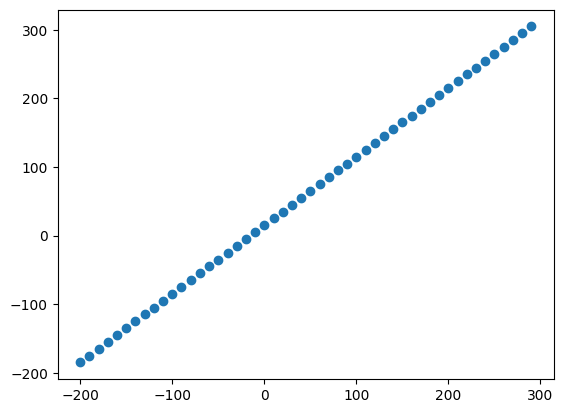

In [15]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### 3 sets....
* Train Test
* Validation Test
* Test Set


In [16]:
#split X to the train and test set
X_train = X[:40]
X_test = X[40:]
#split y too
y_train = y[:40]
y_test = y[40:]

### Visulising dataset
Now we have got our data in the training and test datasets

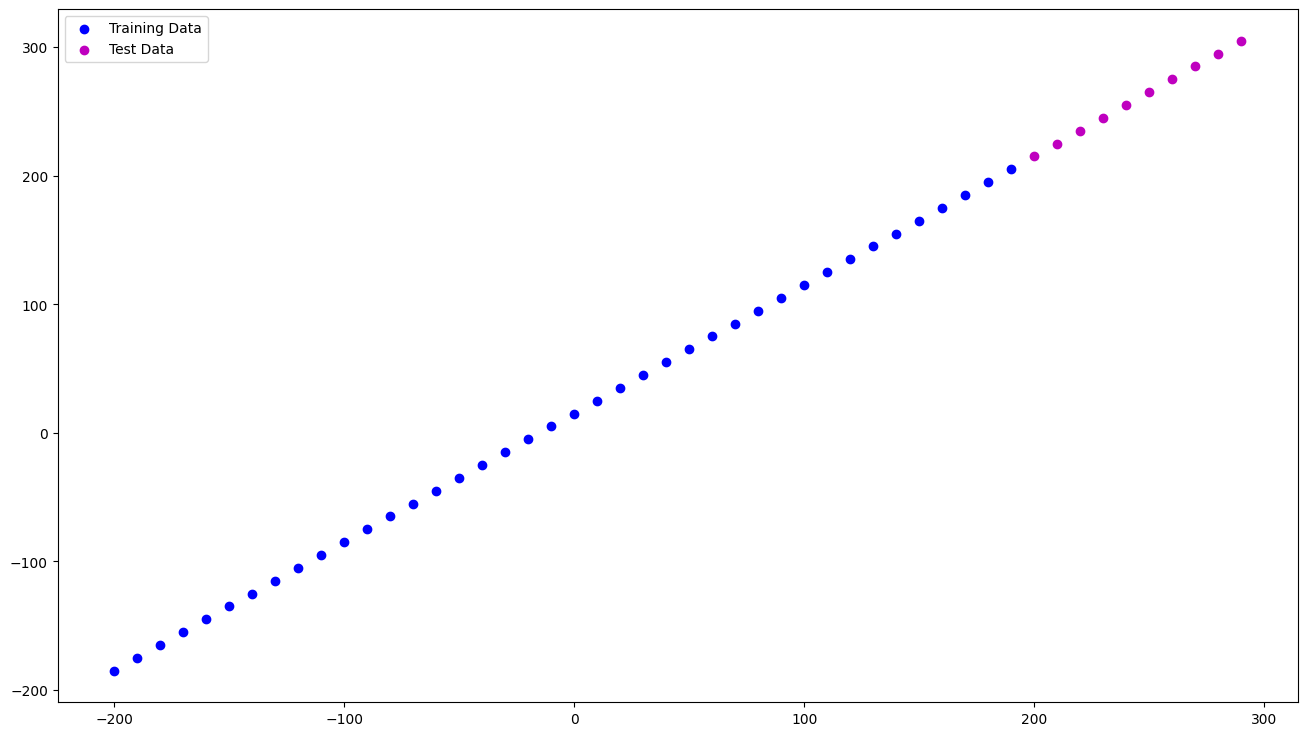

In [17]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c='b',label = 'Training Data')
plt.scatter(X_test,y_test,c= 'm',label = 'Test Data')
plt.legend()
plt.show()

### Visualising the model



In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.0001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 100,batch_size = 10)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 92.7364 - mae: 92.7364
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 77.1252 - mae: 77.1252
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 60.7097 - mae: 60.7097
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 43.5488 - mae: 43.5488
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 28.3898 - mae: 28.3898
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 16.2758 - mae: 16.2758
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 8.3039 - mae: 8.3039
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 12.3266 - mae: 12.3266
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 8.4460 - mae: 8.4460
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 7.3685 - mae: 7.3685
Epoch 11/100
4/4 [==============================] - 0s 4ms/step -

In [19]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 70ms/step


In [20]:
predictions

array([[217.34935],
       [227.90527],
       [238.46117],
       [249.01707],
       [259.57297],
       [270.1289 ],
       [280.6848 ],
       [291.2543 ],
       [301.83145],
       [312.4087 ]], dtype=float32)

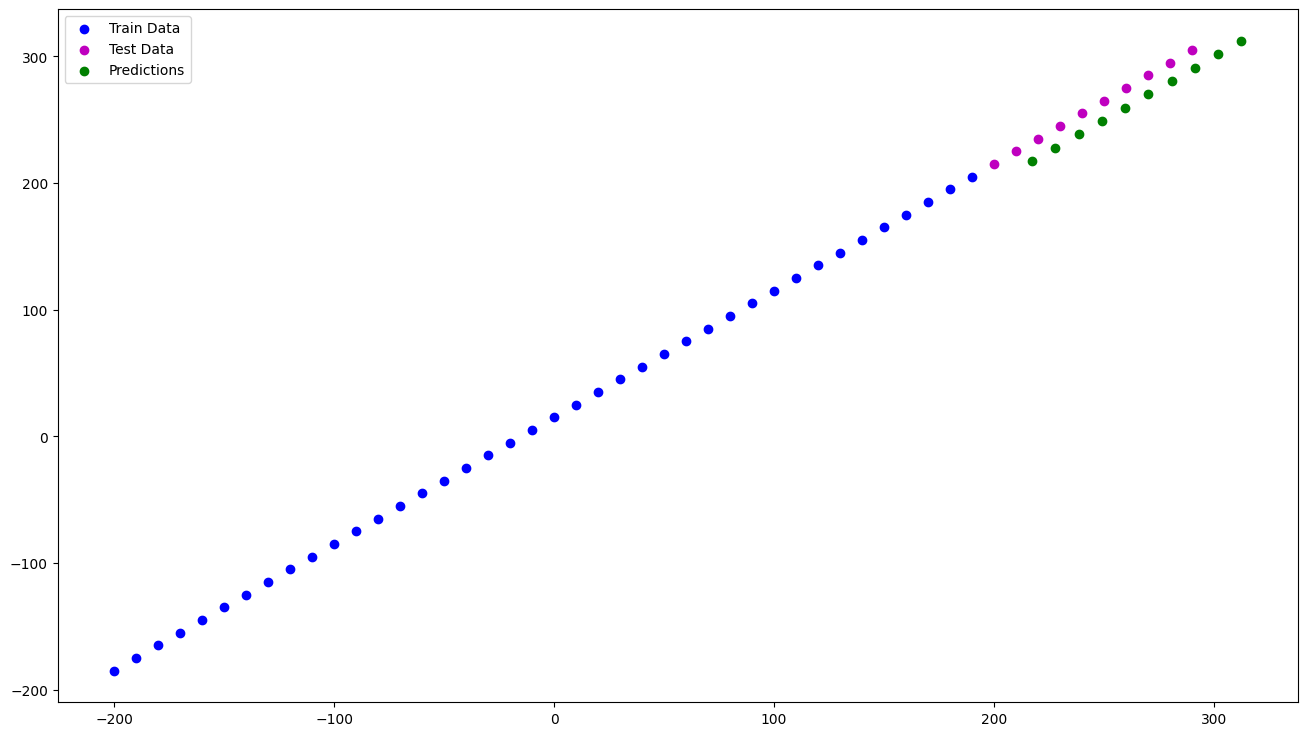

In [21]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c= 'b',label = 'Train Data')
plt.scatter(X_test,y_test,c= 'm',label= 'Test Data')
plt.scatter(predictions,predictions,c ='g',label= 'Predictions')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (10, 100)                 200       
                                                                 
 dense_9 (Dense)             (10, 100)                 10100     
                                                                 
 dense_10 (Dense)            (10, 100)                 10100     
                                                                 
 dense_11 (Dense)            (10, 1)                   101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


### Another way to visualise our model


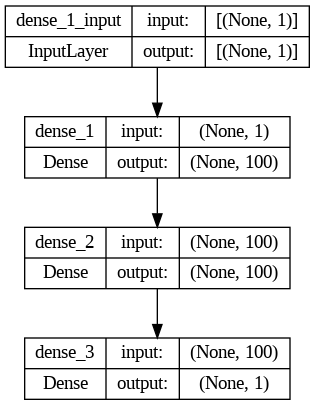

In [23]:
# import plot_model
from tensorflow.keras.utils import plot_model
#make a plot
plot_model(model = improved_model,show_shapes=1,show_dtype=False)

In [24]:
  #Let's create a model and get more spesific summary

  #create the model
  summarized_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100,activation= 'relu', name='Input_Layer'),
      tf.keras.layers.Dense(100,activation= 'relu', name= 'First_Hidden_Layer'),
      tf.keras.layers.Dense(100,activation= 'relu', name= 'Second_Hidden_Layer'),
      tf.keras.layers.Dense(1,name= 'Output_Layer')],name= 'Just one of our models....')

  #compile the model
  summarized_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

  summarized_model.build((40,1))
  #fit the model
  #summarized_model.fit(tf.expand_dims(X_train,axis=-1) ,y_train, epochs= 50)  #if you set the verbose yo don't get the training or something

In [25]:
#get the summary
summarized_model.summary()

Model: "Just one of our models...."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (40, 100)                 200       
                                                                 
 First_Hidden_Layer (Dense)  (40, 100)                 10100     
                                                                 
 Second_Hidden_Layer (Dense)  (40, 100)                10100     
                                                                 
 Output_Layer (Dense)        (40, 1)                   101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


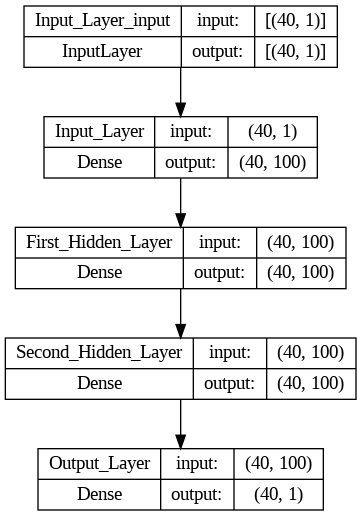

In [26]:
plot_model(summarized_model,show_shapes=True)

## Visualise our model predictions.
Steps that must be taken:
* Create tensors
* Build a model
* Get the predictions
* Visualise the model predictions

In [27]:
##create tensors
X = tf.range(57,431,3)
y = X + 10

#split them to the train and test data
X_train = X[:100]
X_test = X[100:]
y_train = y[:100]
y_test = y[100:]
#create a Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.001),
              metrics= ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 193.4264 - mae: 193.4264
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 154.6001 - mae: 154.6001
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 118.7751 - mae: 118.7751
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 83.6651 - mae: 83.6651
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 50.7207 - mae: 50.7207
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 15.5635 - mae: 15.5635
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 15.4756 - mae: 15.4756
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 22.7564 - mae: 22.7564
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 12.6689 - mae: 12.6689
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 6.3891 - mae: 6.3891
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - 

In [28]:
#get the predictions
model_predictions = model.predict(X_test)
model_predictions

1/1 [==============================] - 0s 89ms/step


array([[376.5253 ],
       [379.68063],
       [382.83597],
       [385.9913 ],
       [389.14664],
       [392.30194],
       [395.45728],
       [398.61264],
       [401.76794],
       [404.92325],
       [408.07858],
       [411.23395],
       [414.38928],
       [417.5446 ],
       [420.69992],
       [423.85526],
       [427.0106 ],
       [430.16592],
       [433.32126],
       [436.47656],
       [439.63193],
       [442.78723],
       [445.9426 ],
       [449.0979 ],
       [452.2532 ]], dtype=float32)

In [29]:
#creating function to plot the predictions
def plot_predictions(predictions):
  plt.figure(figsize=(16,9))
  #visualise train data
  plt.scatter(X_train,y_train,c= 'b',label='Train Data')
  #visualise test data
  plt.scatter(X_test,y_test,c= 'g',label='Test Data')
  #visualise predictions data
  plt.scatter(X_test,predictions,c= 'm',label='Predictions')
  #plot legend
  plt.legend()
  #show the plot
  plt.show()

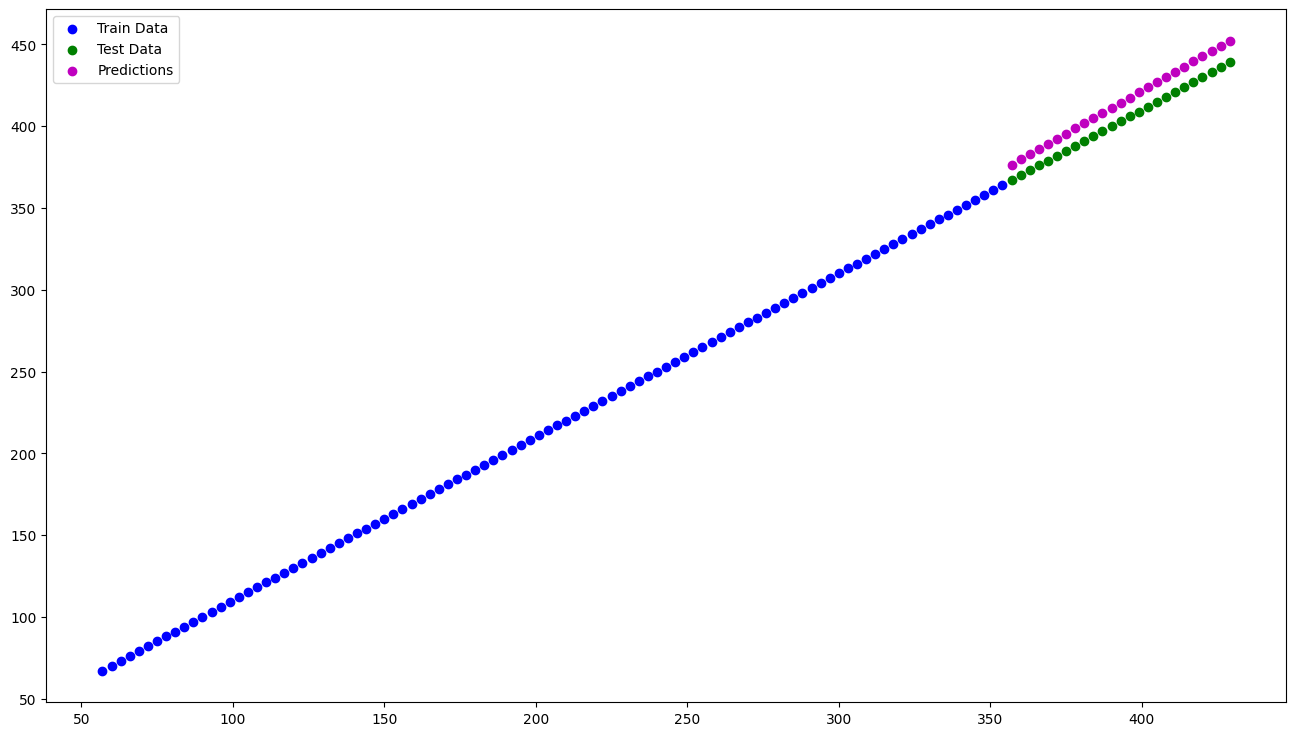

In [30]:
#plot predictions
plot_predictions(model_predictions)

## Common Eveluation Metrics
Depending on the problem, there will be different evaluation metrics.In the Regression Probelems:
* MAE - mean absolute error
* MSE - mean squared error
* Huber - combination of mae and mse(less sensitive to the outliers than mse)

In [31]:
#let's get evaluate our model(getting mae)
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 155ms/step - loss: 11.3893 - mae: 11.3893


[11.389266014099121, 11.389266014099121]

In [34]:
np.mean(tf.metrics.mean_absolute_error(tf.expand_dims(y_test,axis=-1),tf.constant(model_predictions)))
#shape and dtype have to be same to evaluate metrics

11.389266

In [35]:
#getting mean squared error
tf.losses.mean_squared_error(tf.squeeze(tf.constant(model_predictions)),tf.squeeze(y_test))  #when 11...,mae is squared it would be around 120

<tf.Tensor: shape=(), dtype=int32, numpy=119>

In [36]:
#create functions to get mae and mse wheneven you want
def mae(y_test,predictions):
  return np.mean(tf.metrics.mean_absolute_error(tf.expand_dims(y_test,axis=-1),tf.constant(predictions)))

def mse(y_test,predictions):
  return tf.losses.mean_squared_error(tf.squeeze(tf.constant(predictions)),tf.squeeze(y_test))

## Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
**Build model_1**

In [37]:
#create model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss= 'mae',optimizer = 'adam',metrics=['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 174.5023 - mae: 174.5023
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 173.6760 - mae: 173.6760
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 172.8501 - mae: 172.8501
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 172.0163 - mae: 172.0163
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 171.2009 - mae: 171.2009
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 170.3582 - mae: 170.3582
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 169.5413 - mae: 169.5413
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 168.7310 - mae: 168.7310
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 167.9056 - mae: 167.9056
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 167.0921 - mae: 167.0921
Epoch 11/100
4/4 [=====================

1/1 [==============================] - 0s 74ms/step


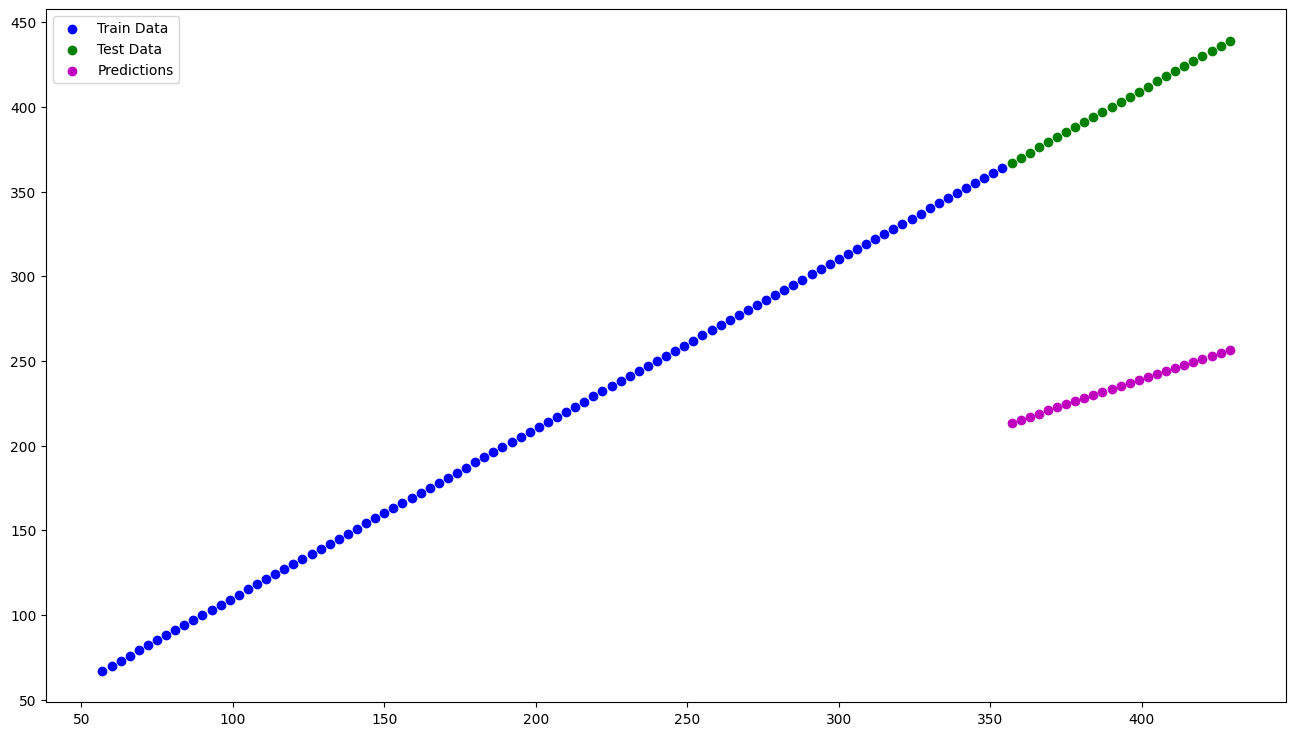

In [38]:
plot_predictions(model_1.predict(X_test))

In [39]:
mae(y_test, model_1.predict(X_test))

1/1 [==============================] - 0s 21ms/step


167.96707

`Build model_2`

In [40]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= 'mae',optimizer='adam',metrics=['mae'])

model_2.fit(tf.expand_dims(X_train,axis= -1),y_train,epochs= 100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 208.6080 - mae: 208.6080
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 169.8380 - mae: 169.8380
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 131.4592 - mae: 131.4592
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 93.5562 - mae: 93.5562
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 59.9772 - mae: 59.9772
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 24.0413 - mae: 24.0413
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 12.3640 - mae: 12.3640
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 25.3788 - mae: 25.3788
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 17.3907 - mae: 17.3907
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 5.7004 - mae: 5.7004
Epoch 11/100
4/4 [==============================] - 0s 

1/1 [==============================] - 0s 58ms/step


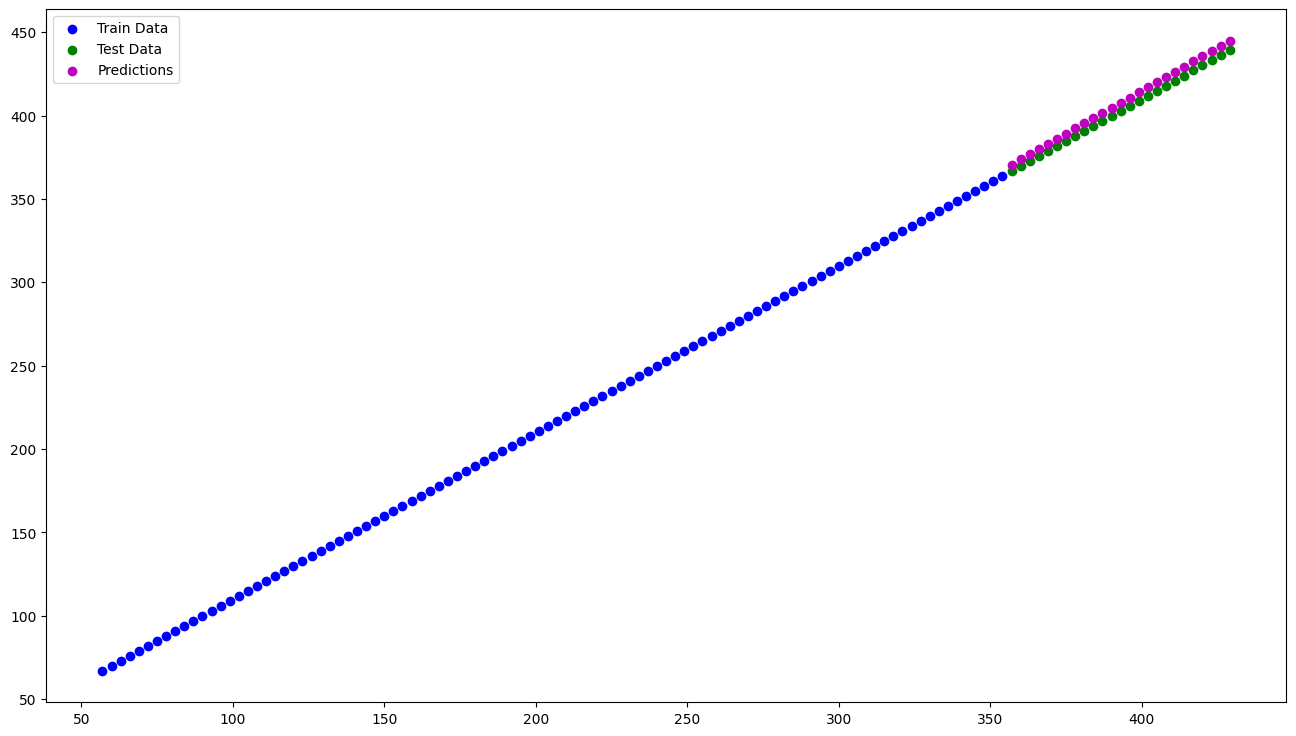

In [41]:
plot_predictions(model_2.predict(X_test))

In [42]:
mae(y_test,model_2.predict(X_test))

1/1 [==============================] - 0s 21ms/step


4.699905

`Build model_3`

In [43]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='mae',optimizer= 'adam',metrics=['mae'])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs= 500)

Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 222.9872 - mae: 222.9872
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 192.3590 - mae: 192.3590
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 167.6689 - mae: 167.6689
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 139.6106 - mae: 139.6106
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 105.8422 - mae: 105.8422
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 64.7110 - mae: 64.7110
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 14.3984 - mae: 14.3984
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 25.5131 - mae: 25.5131
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 17.1341 - mae: 17.1341
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 9.1235 - mae: 9.1235
Epoch 11/500
4/4 [==============================] -

1/1 [==============================] - 0s 68ms/step


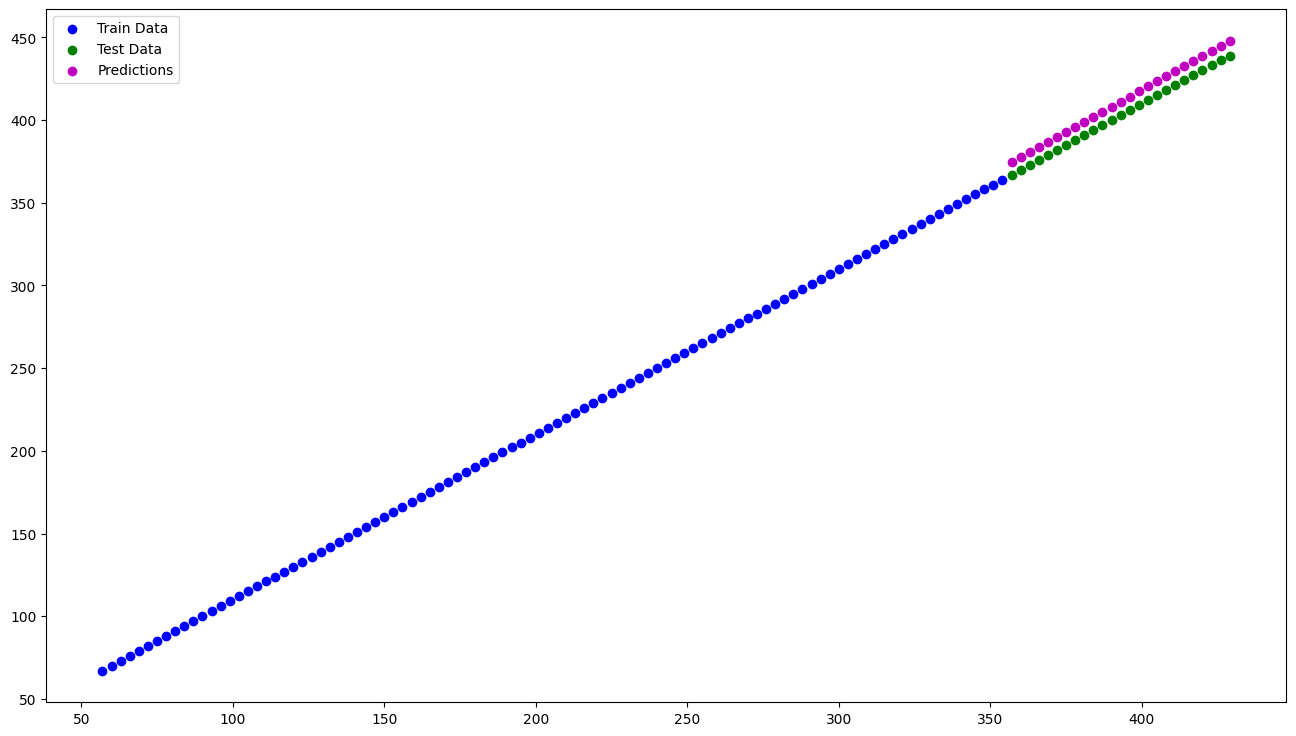

In [44]:
plot_predictions(model_3.predict(X_test))  #already x_test and predictions is the same,great!

In [45]:
mae(y_test,model_3.predict(X_test))

1/1 [==============================] - 0s 24ms/step


8.146204

## Saving our model
Saving model is create chance to use model outside the google colab or wherever it is created(web browser and mobile app)

There are 2 main formats that we can save our model:
1. The SavedModel Format
2. The HDF5 Format

In [46]:
#saving best model(model_2) using SavedModel Format
model_2.save('the_best_model_saved_model_format')

In [47]:
#saving model using HDF5 format
model_2.save('the_best_model_HDF5_format.h5')

## How to load and use saved model

In [48]:
#load the saved model
saved_model = tf.keras.models.load_model('/content/the_best_model_saved_model_format')
saved_model